In [1]:
import caffe
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe.set_mode_cpu
np.set_printoptions(threshold='nan')

root = 'E:\MTCNN_face_detection_alignment-master\code\codes\MTCNNv1\model'
net = caffe.Net(root+'\det1.prototxt',root+'\det1.caffemodel',caffe.TRAIN)
[(k, v[0].data.shape) for k, v in net.params.items()]


net.params.items()

C:\ProgramData\Anaconda2\lib\site-packages\caffe\pycaffe.py:13: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
C:\ProgramData\Anaconda2\lib\site-packages\caffe\pycaffe.py:13: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
C:\ProgramData\Anaconda2\lib\site-packages\caffe\pycaffe.py:13: RuntimeWarning: to-Python converter for class boost::shared_ptr<class caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


[('conv1', <caffe._caffe.BlobVec at 0x171a4ba8>),
 ('PReLU1', <caffe._caffe.BlobVec at 0x171a4c78>),
 ('conv2', <caffe._caffe.BlobVec at 0x171a4ce0>),
 ('PReLU2', <caffe._caffe.BlobVec at 0x171a4d48>),
 ('conv3', <caffe._caffe.BlobVec at 0x171a4db0>),
 ('PReLU3', <caffe._caffe.BlobVec at 0x171a4e18>),
 ('conv4-1', <caffe._caffe.BlobVec at 0x171a4e80>),
 ('conv4-2', <caffe._caffe.BlobVec at 0x171a4ee8>)]

In [2]:
def show_feature(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.imshow(data)
    plt.axis('off')

(10L, 3L, 3L, 3L)


array([[[[0.42055964, 0.43262997, 0.4579311 ],
         [0.5868407 , 0.47848353, 0.36090726],
         [0.66124636, 0.19156653, 0.33010802]],

        [[0.38709497, 0.48927343, 0.45402336],
         [0.58978367, 0.4933798 , 0.3751693 ],
         [0.5291262 , 0.23770787, 0.34541035]],

        [[0.4105486 , 0.45377013, 0.40285617],
         [0.4383299 , 0.5143497 , 0.41661426],
         [0.44145918, 0.39614356, 0.4461755 ]]],


       [[[0.5237733 , 0.49427655, 0.5776391 ],
         [0.2768126 , 0.29219887, 0.48452803],
         [0.        , 0.30407995, 0.48147628]],

        [[0.34572995, 0.41156256, 0.3900372 ],
         [0.48447314, 0.37804192, 0.40201652],
         [0.64141226, 0.5302177 , 0.56065065]],

        [[0.38175252, 0.47710732, 0.3263612 ],
         [0.6506426 , 0.5124899 , 0.39350334],
         [0.663537  , 0.5575383 , 0.26058573]]],


       [[[0.30774003, 0.42541364, 0.3386294 ],
         [0.46827185, 0.46560666, 0.41728693],
         [0.3698294 , 0.47216153, 0.3922789 

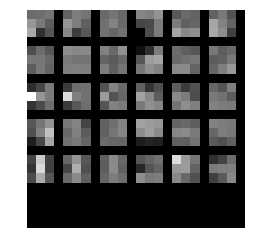

In [3]:
weight1 = net.params["conv1"][0].data
print weight1.shape
#target=weight1.reshape(20*1, 5, 5)
show_feature(weight1.reshape(10*3, 3, 3))
weight1

(10L,)


array([0.2851136 , 0.46577975, 1.        , 0.7508459 , 0.10636108,
       0.69861597, 0.42813352, 0.6682111 , 0.17274249, 0.        ],
      dtype=float32)

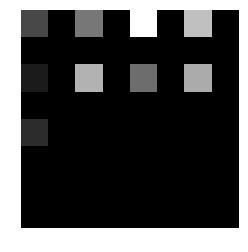

In [4]:
weight2 = net.params["PReLU1"][0].data
print weight2.shape
show_feature(weight2.reshape(10, 1, 1))
weight2

(16L, 10L, 3L, 3L)


array([[[[0.49825037, 0.4203313 , 0.36342612],
         [0.6252795 , 0.54063284, 0.38534167],
         [0.4326468 , 0.44719347, 0.77614117]],

        [[0.5254158 , 0.61817276, 0.6023535 ],
         [0.5434986 , 0.57231253, 0.4066273 ],
         [0.44670215, 0.48739854, 0.5400859 ]],

        [[0.5054602 , 0.60586   , 0.6524224 ],
         [0.5737362 , 0.5208206 , 0.42808568],
         [0.5308864 , 0.62451744, 0.3966427 ]],

        [[0.6310173 , 0.5000101 , 0.59677374],
         [0.34803185, 0.552725  , 0.3550329 ],
         [0.6970164 , 0.44422823, 0.6800522 ]],

        [[0.6725931 , 0.5836916 , 0.5484767 ],
         [0.5285452 , 0.47415456, 0.4971471 ],
         [0.5427849 , 0.41457698, 0.41472322]],

        [[0.4591754 , 0.5883814 , 0.52261424],
         [0.5833328 , 0.6591345 , 0.5310535 ],
         [0.5558024 , 0.5221802 , 0.49706158]],

        [[0.53391606, 0.4253623 , 0.60695547],
         [0.5965942 , 0.75393337, 0.44613495],
         [0.5462651 , 0.45540026, 0.00970319]],


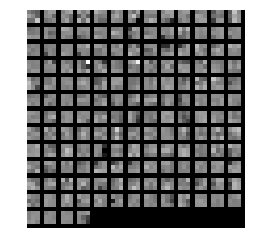

In [5]:
weight3 = net.params["conv2"][0].data
print weight3.shape
show_feature(weight3.reshape(16*10, 3, 3))
weight3

(16L,)


array([0.61785126, 0.76132405, 0.8107588 , 0.5911732 , 0.7507101 ,
       0.8614504 , 0.9908388 , 1.        , 0.73079497, 0.        ,
       0.6833137 , 0.7459139 , 0.546957  , 0.38346773, 0.32720137,
       0.48723778], dtype=float32)

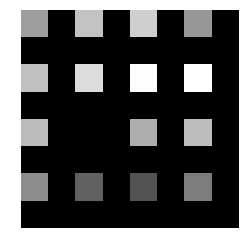

In [6]:
weight4 = net.params["PReLU2"][0].data
print weight4.shape
show_feature(weight4.reshape(16, 1, 1))
weight4

(32L, 16L, 3L, 3L)


array([[[[0.49046388, 0.5354276 , 0.36448926],
         [0.7507542 , 0.68864   , 0.5791132 ],
         [0.70466053, 0.61422104, 0.67570555]],

        [[0.53757834, 0.4510003 , 0.5981347 ],
         [0.41250506, 0.47918105, 0.5149982 ],
         [0.32217395, 0.38781187, 0.39794892]],

        [[0.1635737 , 0.35781366, 0.06882565],
         [0.22569996, 0.38626194, 0.4123131 ],
         [0.29446167, 0.40299144, 0.4744925 ]],

        [[0.48283798, 0.44759178, 0.49805033],
         [0.36627433, 0.3524376 , 0.41149694],
         [0.46923274, 0.43728188, 0.4001456 ]],

        [[0.4644431 , 0.49013352, 0.33414328],
         [0.59264535, 0.55039763, 0.6020151 ],
         [0.620131  , 0.48265198, 0.5038283 ]],

        [[0.5172893 , 0.31410712, 0.5371678 ],
         [0.56763524, 0.42528668, 0.34550437],
         [0.50528896, 0.4944309 , 0.34513414]],

        [[0.492087  , 0.5296845 , 0.48688856],
         [0.5644707 , 0.33714148, 0.40636438],
         [0.61169416, 0.35282278, 0.47189972]],


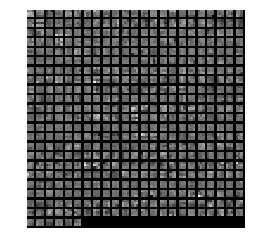

In [7]:
weight5 = net.params["conv3"][0].data
print weight5.shape
show_feature(weight5.reshape(32*16, 3, 3))
weight5

(32L,)


array([0.4229329 , 0.32854265, 0.45871302, 0.05035161, 0.07491498,
       0.25355437, 0.3703606 , 0.42459366, 0.35649607, 0.35288388,
       0.45504594, 0.10356398, 0.15673408, 0.5156042 , 0.54540235,
       0.3096133 , 0.16304493, 0.59518534, 0.63328856, 0.34849814,
       0.        , 0.3562571 , 0.29448062, 0.19165106, 0.37849963,
       1.        , 0.6603834 , 0.5998281 , 0.4320693 , 0.2076062 ,
       0.25510383, 0.57897484], dtype=float32)

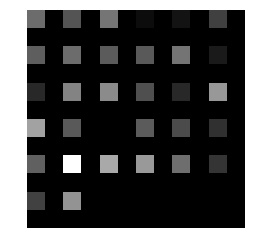

In [8]:
weight6 = net.params["PReLU3"][0].data
print weight6.shape
show_feature(weight6.reshape(32, 1, 1))
weight6

(2L, 32L, 1L, 1L)


array([[[[0.5280519 ]],

        [[0.5660867 ]],

        [[0.        ]],

        [[0.5104535 ]],

        [[0.6232297 ]],

        [[0.4357943 ]],

        [[0.5808879 ]],

        [[0.41634482]],

        [[0.08459431]],

        [[0.73025936]],

        [[0.62421006]],

        [[0.21010661]],

        [[0.48292068]],

        [[0.5706841 ]],

        [[0.7695843 ]],

        [[0.6373654 ]],

        [[0.7766346 ]],

        [[0.46556345]],

        [[0.21777107]],

        [[0.6193682 ]],

        [[0.16395655]],

        [[0.4001312 ]],

        [[0.34890687]],

        [[0.3146469 ]],

        [[0.21831004]],

        [[0.67515093]],

        [[0.68457717]],

        [[0.45360735]],

        [[0.16750011]],

        [[0.2943394 ]],

        [[0.5631366 ]],

        [[1.        ]]],


       [[[0.17913248]],

        [[0.22457728]],

        [[0.6177353 ]],

        [[0.1788811 ]],

        [[0.2628591 ]],

        [[0.81411827]],

        [[0.25800675]],

        [[0.26943687]],

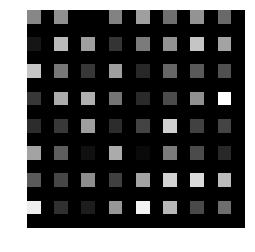

In [9]:
weight7 = net.params["conv4-1"][0].data
print weight7.shape
show_feature(weight7.reshape(2*32, 1, 1))
weight7

(4L, 32L, 1L, 1L)


array([[[[0.42862365]],

        [[0.4886669 ]],

        [[0.4590722 ]],

        [[0.43401745]],

        [[0.45318156]],

        [[0.5411567 ]],

        [[0.43800482]],

        [[0.39229396]],

        [[0.40478247]],

        [[0.4166641 ]],

        [[0.4507167 ]],

        [[0.46349144]],

        [[0.4279168 ]],

        [[0.41922268]],

        [[0.4436904 ]],

        [[0.45273688]],

        [[0.42095628]],

        [[1.        ]],

        [[0.31957772]],

        [[0.31049564]],

        [[0.4517253 ]],

        [[0.44259688]],

        [[0.41450247]],

        [[0.46229702]],

        [[0.43142235]],

        [[0.4522799 ]],

        [[0.33582637]],

        [[0.        ]],

        [[0.4560983 ]],

        [[0.46484575]],

        [[0.4593592 ]],

        [[0.5295078 ]]],


       [[[0.42085397]],

        [[0.4715664 ]],

        [[0.45926702]],

        [[0.4238468 ]],

        [[0.44725165]],

        [[0.45008022]],

        [[0.2902396 ]],

        [[0.5588548 ]],

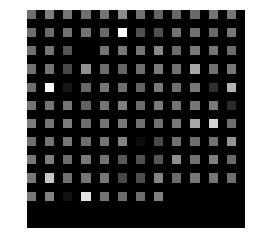

In [10]:
weight8 = net.params["conv4-2"][0].data
print weight8.shape
show_feature(weight8.reshape(4*32, 1, 1))
weight8

In [11]:
list1 = weight1.tolist()
fp = open('Pnet_conv1.txt','w+')
for i in range(0,10):
    for j in range(0,3):
        for k in range (0,3):
            for l in range(0,3):
                fp.write(str(list1[i][j][k][l]))
                fp.write(" ")
        fp.write("\n")

fp.close() 

list3 = weight3.tolist()
fp = open('Pnet_conv2.txt','w+')
for i in range(0,16):
    for j in range(0,10):
        for k in range (0,3):
            for l in range(0,3):
                fp.write(str(list3[i][j][k][l]))
                fp.write(" ")
        fp.write("\n")

fp.close() 

list5 = weight5.tolist()
fp = open('Pnet_conv3.txt','w+')
for i in range(0,32):
    for j in range(0,16):
        for k in range (0,3):
            for l in range(0,3):
                fp.write(str(list5[i][j][k][l]))
                fp.write(" ")
        fp.write("\n")

fp.close() 

list7 = weight7.tolist()
fp = open('Pnet_conv41.txt','w+')
for i in range(0,2):
    for j in range(0,32):
        for k in range (0,1):
            for l in range(0,1):
                fp.write(str(list7[i][j][k][l]))
                fp.write(" ")
        fp.write("\n")

fp.close() 

list8 = weight8.tolist()
fp = open('Pnet_conv42.txt','w+')
for i in range(0,4):
    for j in range(0,32):
        for k in range (0,1):
            for l in range(0,1):
                fp.write(str(list8[i][j][k][l]))
                fp.write(" ")
        fp.write("\n")

fp.close() 

In [12]:
160*9

1440